In [1]:
import thinkstats2
pmf = thinkstats2.Pmf([1,2,2,3,5])

In [2]:
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [3]:
pmf.Prob(2)

0.4

In [4]:
pmf[2]

0.4

In [5]:
pmf.Incr(2,0.2)
pmf.Prob(2)

0.6000000000000001

In [7]:
pmf.Mult(2,0.5)

In [8]:
pmf.Prob(2)

0.30000000000000004

In [9]:
pmf.Total()

0.8999999999999999

In [10]:
pmf.Normalize()

0.8999999999999999

In [11]:
pmf

Pmf({1: 0.22222222222222224, 2: 0.33333333333333337, 3: 0.22222222222222224, 5: 0.22222222222222224})

In [12]:
pmf.Total()

1.0

In [16]:
import thinkplot
%matplotlib inline

/home/kunal/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


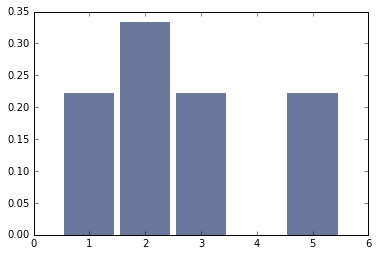

In [17]:
thinkplot.Hist(pmf)
thinkplot.show()

In [29]:
import chap01soln
import nsfg
resp = nsfg.ReadFemPreg()

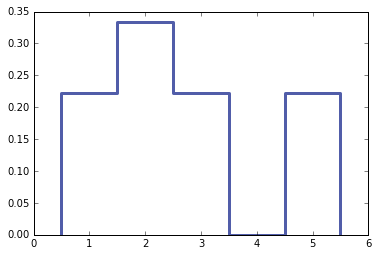

In [30]:
pregLengthPmf = thinkstats2.Pmf(pmf)
thinkplot.Pmf(pregLengthPmf)

In [47]:
resp = resp[resp.outcome == 1]
firsts = resp[resp.birthord == 1]
others = resp[resp.birthord != 1]

In [48]:
first_pmf = thinkstats2.Pmf(firsts.prglngth)
others_pmf = thinkstats2.Pmf(others.prglngth)

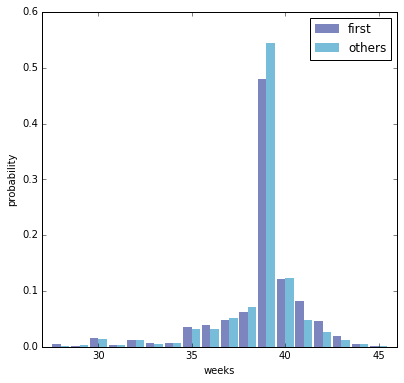

In [49]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align ='right', width=width, label='first')
thinkplot.Hist(others_pmf, align = 'left', width=width, label='others')
thinkplot.Config(xlabel='weeks', ylabel='probability', axis=[27,46,0,0.6])

/home/kunal/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


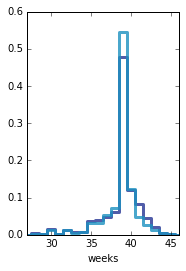

In [50]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, others_pmf])
thinkplot.Show(xlabel='weeks', axis=[27,46,0,0.6])

In [53]:
weeks = range(34,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = others_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

/home/kunal/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


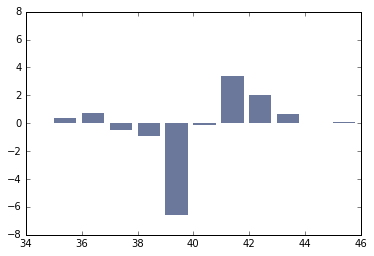

In [52]:
thinkplot.Bar(weeks,diffs)
thinkplot.Show(axis = [34,46,-8,8])

In [54]:
#above graph proves that first babies are less likely to be born in week 39 and more likedlyto be born in week 41
# and week 42

In [55]:
d = {7:8, 12:8, 17:14, 22:4,
     27:5, 32:12, 37:8, 42:3, 47:2}

In [58]:
classPmf = thinkstats2.Pmf(d, label='actual')
print('mean: ', classPmf.Mean())

mean:  23.640625


In [59]:
#prob associated with class size is "biased" by number of students in the class.

In [61]:
def BiasPmf(pmf, label):
    newClassPmf = classPmf.Copy(label=label)
    for x,p in classPmf.Items():
        newClassPmf.Mult(x,x)
    newClassPmf.Normalize()
    return newClassPmf

In [62]:
biased_pmf = BiasPmf(classPmf, label='observed')

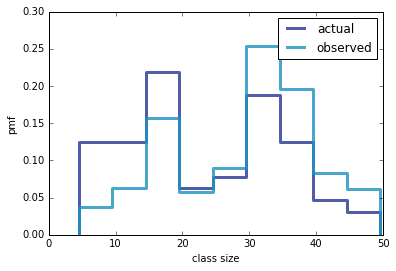

In [64]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([classPmf,biased_pmf])
thinkplot.show(xlabel='class size', ylabel='pmf')

In [66]:
biased_pmf.Mean(), classPmf.Mean()

(29.161269001982813, 23.640625)

In [1]:
import numpy as np
import pandas

In [3]:
array = np.random.randn(4,2)
df = pandas.DataFrame(array)

In [4]:
df

,0,1
0,-0.147287,-0.578954
1,-0.494346,-2.150717
2,0.717338,-0.368728
3,1.157692,-1.039075


In [5]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-0.147287,-0.578954
1,-0.494346,-2.150717
2,0.717338,-0.368728
3,1.157692,-1.039075


In [6]:
index = ['a','b','c','d']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.147287,-0.578954
b,-0.494346,-2.150717
c,0.717338,-0.368728
d,1.157692,-1.039075


In [7]:
df['A']

a   -0.147287
b   -0.494346
c    0.717338
d    1.157692
Name: A, dtype: float64

In [8]:
df.loc['a']

A   -0.147287
B   -0.578954
Name: a, dtype: float64

In [15]:
df.iloc[0:3]

,A,B
a,-0.147287,-0.578954
b,-0.494346,-2.150717
c,0.717338,-0.368728


In [12]:
indices = ['a','c']
df.loc[indices]

,A,B
a,-0.147287,-0.578954
c,0.717338,-0.368728


In [16]:
df['a':'c']

,A,B
a,-0.147287,-0.578954
b,-0.494346,-2.150717
c,0.717338,-0.368728


In [19]:
df[0:3]

,A,B
a,-0.147287,-0.578954
b,-0.494346,-2.150717
c,0.717338,-0.368728
